In [251]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [252]:
df = pd.read_excel("/content/FEH_00200565_231016082913.xlsx")
df = df.iloc[9:, :3]

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [253]:
df.columns = ["日付コード", "日付", "支出"]
df = df[::-1].reset_index(drop=True)
df

,日付コード,日付,支出
0,2017000101,2017年1月,"3,931"
1,2017000202,2017年2月,"3,175"
2,2017000303,2017年3月,"5,085"
3,2017000404,2017年4月,"3,377"
4,2017000505,2017年5月,"3,795"
...,...,...,...
75,2023000404,2023年4月,"6,685"
76,2023000505,2023年5月,"7,061"
77,2023000606,2023年6月,"7,168"
78,2023000707,2023年7月,"9,309"


In [254]:
df["支出"] = df["支出"].str.replace(",", "")
df

,日付コード,日付,支出
0,2017000101,2017年1月,3931
1,2017000202,2017年2月,3175
2,2017000303,2017年3月,5085
3,2017000404,2017年4月,3377
4,2017000505,2017年5月,3795
...,...,...,...
75,2023000404,2023年4月,6685
76,2023000505,2023年5月,7061
77,2023000606,2023年6月,7168
78,2023000707,2023年7月,9309


In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   日付コード   80 non-null     object
 1   日付      80 non-null     object
 2   支出      80 non-null     object
dtypes: object(3)
memory usage: 2.0+ KB


In [256]:
df["支出"] = df["支出"].astype(np.int64)
df["日付"] = df["日付"].astype(str)
df["日付"] = pd.to_datetime(df["日付"], format="%Y年%m月")
df["POSIX"] = df["日付"].astype(np.int64) // 10**9
df["year"] = df["日付"].dt.year
df["month"] = df["日付"].dt.month


In [257]:
df.head()

,日付コード,日付,支出,POSIX,year,month
0,2017000101,2017-01-01,3931,1483228800,2017,1
1,2017000202,2017-02-01,3175,1485907200,2017,2
2,2017000303,2017-03-01,5085,1488326400,2017,3
3,2017000404,2017-04-01,3377,1491004800,2017,4
4,2017000505,2017-05-01,3795,1493596800,2017,5


In [258]:
df.to_csv("/content/drive/MyDrive/comsumer_temperature/datasets/sightseeing.csv")

In [259]:
month = 5

for i in range(1, month):
    df[f"{i}mago"] = df["支出"].shift(i)

df = df.dropna(axis=0)
df.head()

,日付コード,日付,支出,POSIX,year,month,1mago,2mago,3mago,4mago
4,2017000505,2017-05-01,3795,1493596800,2017,5,3377.0,5085.0,3175.0,3931.0
5,2017000606,2017-06-01,3278,1496275200,2017,6,3795.0,3377.0,5085.0,3175.0
6,2017000707,2017-07-01,4997,1498867200,2017,7,3278.0,3795.0,3377.0,5085.0
7,2017000808,2017-08-01,7013,1501545600,2017,8,4997.0,3278.0,3795.0,3377.0
8,2017000909,2017-09-01,3616,1504224000,2017,9,7013.0,4997.0,3278.0,3795.0


In [260]:
df.to_csv("/content/drive/MyDrive/comsumer_temperature/datasets/sightseeing_2.csv")

In [261]:
N = len(df["POSIX"])
N_train = round(N *.8)

In [262]:
X = df.drop(["日付コード", "日付"], axis=1).values
y = df["支出"].values

In [263]:
X_train, y_train = X[:N_train], y[:N_train]
X_test, y_test = X[N_train:], y[N_train:]

In [264]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100,
                           random_state=0)

rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [265]:
y_pred = rf.predict(X_test)

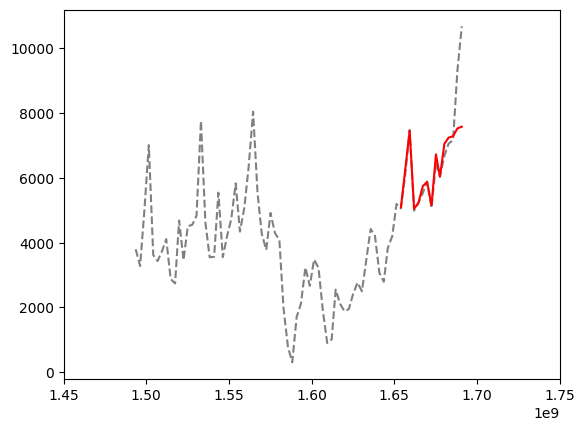

In [266]:
plt.plot(X, y, color="grey", linestyle="--")
plt.plot(X_test, y_pred, color="red")
plt.xlim([1.45e9, 1.75e9])
plt.show()

In [267]:
print(rf.score(X_train, y_train), rf.score(X_test, y_test))

0.9964329000420558 0.6431602436905451


In [268]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred))

427.25399999999996
